# ECG: anomaly detection on electrocardiograms

#### We develop a model that detects anomalous electrocardiograms.

We load the dataset and explore some of its statistics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import tensorflow as tf

In [2]:
data = pd.read_table('ecg.csv', sep=',')
data = shuffle(data)
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x132,x133,x134,x135,x136,x137,x138,x139,x140,label
1983,0.409729,-1.546962,-2.803882,-4.133667,-4.253300,-3.516274,-2.259543,-1.583663,-1.343253,-0.527177,...,1.264443,1.245948,1.424766,1.451793,1.107034,1.071356,1.365528,1.463907,-0.044119,1.0
2128,0.685049,-1.631847,-3.016186,-3.797571,-3.655404,-2.567160,-1.761629,-1.574545,-0.924847,-0.238814,...,1.296263,1.376808,1.275802,1.073409,0.334017,-0.137456,0.220899,1.015043,-1.360922,1.0
313,0.121266,-0.669960,-1.494389,-2.224576,-2.386360,-2.407641,-2.334944,-2.317415,-2.135782,-1.729240,...,-3.258652,-3.734365,-3.889076,-3.270055,-2.339751,-1.448303,-0.555892,-0.668495,-0.160116,0.0
1931,-0.606944,-3.774635,-4.643772,-4.594645,-3.817665,-2.561339,-1.792408,-1.613861,-0.783000,-0.209490,...,1.428509,1.503459,1.349631,1.249295,0.670839,0.352428,0.236719,1.003499,-1.170662,1.0
303,-0.733444,-1.446366,-1.957171,-2.362391,-2.372697,-2.095428,-1.635266,-1.162627,-0.920271,-0.819619,...,-0.048997,-0.443191,-0.660707,-0.778537,-1.276588,-2.050393,-2.630455,-2.854376,-2.841585,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,-0.650520,-2.618832,-3.571182,-4.569388,-4.282039,-3.408080,-2.157295,-1.561440,-1.238577,-0.556748,...,2.072572,2.268951,2.699390,2.742636,1.939675,1.039419,0.608254,0.303592,-1.016212,1.0
3419,0.235310,-0.840376,-1.793064,-2.611932,-3.266536,-3.514356,-3.369830,-3.049186,-2.294712,-1.501502,...,-2.121785,-2.749502,-3.202029,-3.149454,-2.187010,-1.000647,0.067908,0.549946,0.805673,0.0
1165,-1.270236,-3.183815,-4.199869,-4.635473,-3.871260,-2.697511,-1.716317,-1.448224,-0.811601,-0.149983,...,1.027130,1.247817,1.523887,1.422919,0.858062,0.472590,0.554112,0.812674,-0.178631,1.0
1835,-1.786024,-3.845233,-4.565874,-4.780451,-3.979291,-2.610269,-1.838895,-1.540008,-0.725975,-0.494981,...,1.426511,1.293463,1.248128,0.935423,0.751696,0.849828,1.362372,1.366343,-0.590195,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 1983 to 1996
Columns: 141 entries, x1 to label
dtypes: float64(141)
memory usage: 3.8 MB


In [4]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x132,x133,x134,x135,x136,x137,x138,x139,x140,label
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,-0.383585,-2.039012,-3.014909,-3.654428,-3.602058,-3.106830,-2.284460,-1.698657,-1.279858,-0.760496,...,0.614789,0.610068,0.504363,0.344543,0.090781,-0.005472,0.054960,0.155530,-0.590607,0.834000
std,1.214024,1.411718,1.173286,1.013692,0.849118,0.801215,0.695299,0.536416,0.570878,0.596696,...,1.066517,1.242224,1.452918,1.603816,1.642906,1.620762,1.486896,1.465738,1.304176,0.372134
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-3.689322,-4.006379,-4.343008,-4.563270,-5.150100,-4.872557,-5.161072,-5.639460,-5.797645,0.000000
25%,-1.188585,-3.058236,-3.941104,-4.362795,-4.135211,-3.661838,-2.764728,-1.935113,-1.607421,-1.116446,...,0.314083,0.445693,0.167428,-0.246491,-0.720603,-0.867796,-0.758255,-0.619660,-1.453353,1.000000
50%,-0.479752,-2.194497,-3.285291,-4.004963,-3.827223,-3.175479,-2.244037,-1.666154,-1.334584,-0.728200,...,0.966509,1.015870,1.031573,0.939946,0.651223,0.575201,0.495572,0.506568,-0.494828,1.000000
75%,0.385996,-1.142054,-2.257202,-3.151837,-3.322319,-2.622188,-1.822541,-1.456717,-0.980445,-0.374574,...,1.263393,1.337176,1.380802,1.387509,1.231603,1.120664,1.144754,1.217926,0.322592,1.000000
max,4.966414,3.351136,1.628389,1.423006,1.227280,1.105720,1.435708,1.471382,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.363959,3.185404,3.836529,7.402103,1.000000


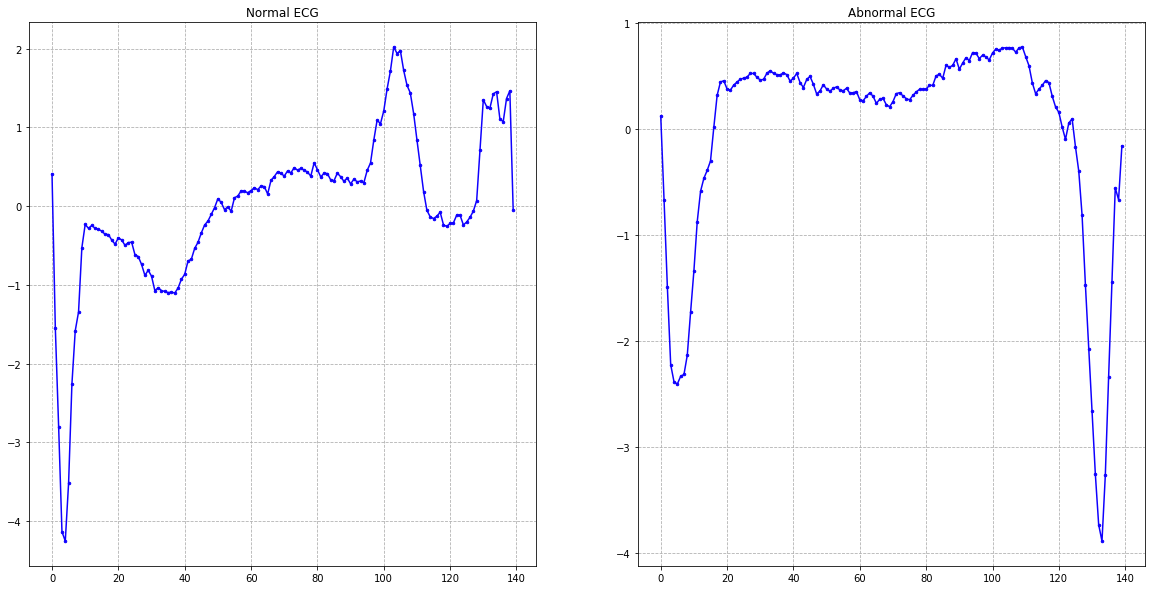

In [5]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax1.grid(b=True, linestyle='--')
ax1.set_title('Normal ECG')
ax1.plot(data.query('label == 1.0').iloc[0,:-1].values, marker='.', color='#0F00FF', markersize=5, linestyle='-')
ax2 = fig.add_subplot(1, 2, 2)
ax2.grid(b=True, linestyle='--')
ax2.set_title('Abnormal ECG')
ax2.plot(data.query('label == 0.0').iloc[0,:-1].values, marker='.', color='#0F00FF', markersize=5, linestyle='-')

(array([ 581.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2919.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

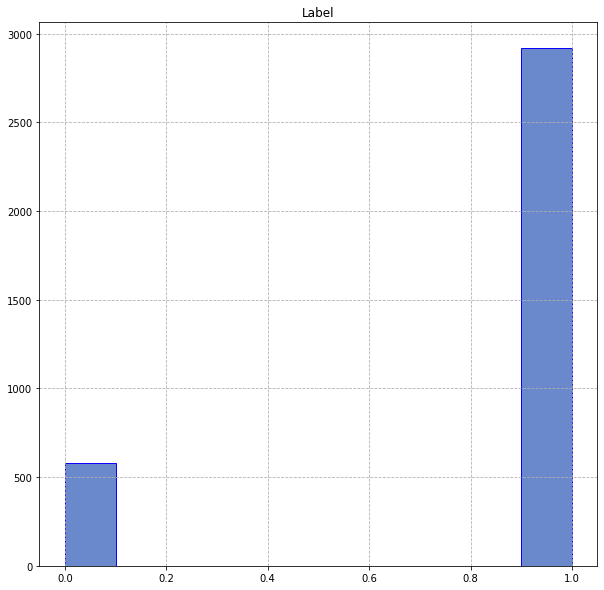

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.grid(b=True, linestyle='--')
ax.set_title('Label')
ax.hist(data.loc[:,'label'].values, color='#6A89CC', edgecolor='#0F00FF')

The dataset is strongly imbalanced so we need to take this into account when we asses the performance of the model.

-----

This function plots the confusion matrix of the model predictions and it will be used to analize its performance.

In [7]:
def plot_confusion_matrix(model, X, Y):    
    y_pred = model.predict(X).flatten()
    y_true = Y.flatten()
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=[1.,0.])
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_xlabel('PREDICTED')
    ax1.set_ylabel('ACTUAL')
    ax1.set_xticklabels(2*['']+['Positive']+3*['']+['Negative']+2*[''])
    ax1.set_yticklabels(2*['']+['Positive']+3*['']+['Negative']+2*[''])
    ax1.text(0., 0., str(cm[0,0]), fontsize=40, color='white', horizontalalignment='center', verticalalignment='center')
    ax1.text(1., 0., str(cm[0,1]), fontsize=40, color='white', horizontalalignment='center', verticalalignment='center')
    ax1.text(0., 1., str(cm[1,0]), fontsize=40, color='white', horizontalalignment='center', verticalalignment='center')
    ax1.text(1., 1., str(cm[1,1]), fontsize=40, color='white', horizontalalignment='center', verticalalignment='center')
    im = ax1.imshow(cm)
    fig.colorbar(mappable=im, ax=ax1, shrink=0.75)
    ax2 = fig.add_subplot(1, 2, 2, frameon=False)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.text(0.4, 0.5, classification_report(y_true, y_pred, digits=4), fontsize=20, color='black', horizontalalignment='center', verticalalignment='center')

-----

Here we define the datasets for training and testing.

In [8]:
X_train = np.concatenate((data.query('label == 1.0').iloc[:2335,:-1].values, data.query('label == 0.0').iloc[:464,:-1].values), axis=0)
Y_train = np.concatenate((data.query('label == 1.0').iloc[:2335,[-1]].values, data.query('label == 0.0').iloc[:464,[-1]].values), axis=0)

X_val = np.concatenate((data.query('label == 1.0').iloc[2335:,:-1].values, data.query('label == 0.0').iloc[464:,:-1].values), axis=0)
Y_val = np.concatenate((data.query('label == 1.0').iloc[2335:,[-1]].values, data.query('label == 0.0').iloc[464:,[-1]].values), axis=0)

In [9]:
b = np.max(X_train, axis=0) + 0.00000000001
a = np.min(X_train, axis=0) - 0.00000000001

-----

Here we train our first model and evaluate its performance. It is a KNN classifier with n=1 just to have a baseline model.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier


model_1 = Pipeline([('lambda', FunctionTransformer(lambda x:(x-a)/(b-a))),
                ('knn', KNeighborsClassifier(n_neighbors=1))])
model_1.fit(X_train, Y_train.flatten())

Pipeline(memory=None,
         steps=[('lambda',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function <lambda> at 0x7fe38fb27e18>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

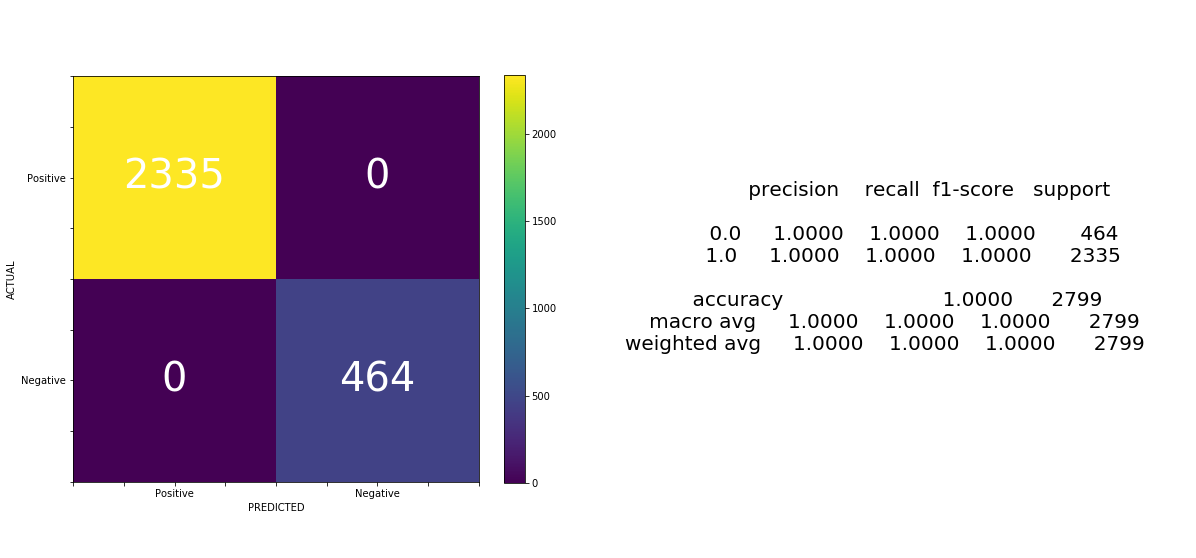

In [11]:
plot_confusion_matrix(model_1, X_train, Y_train)

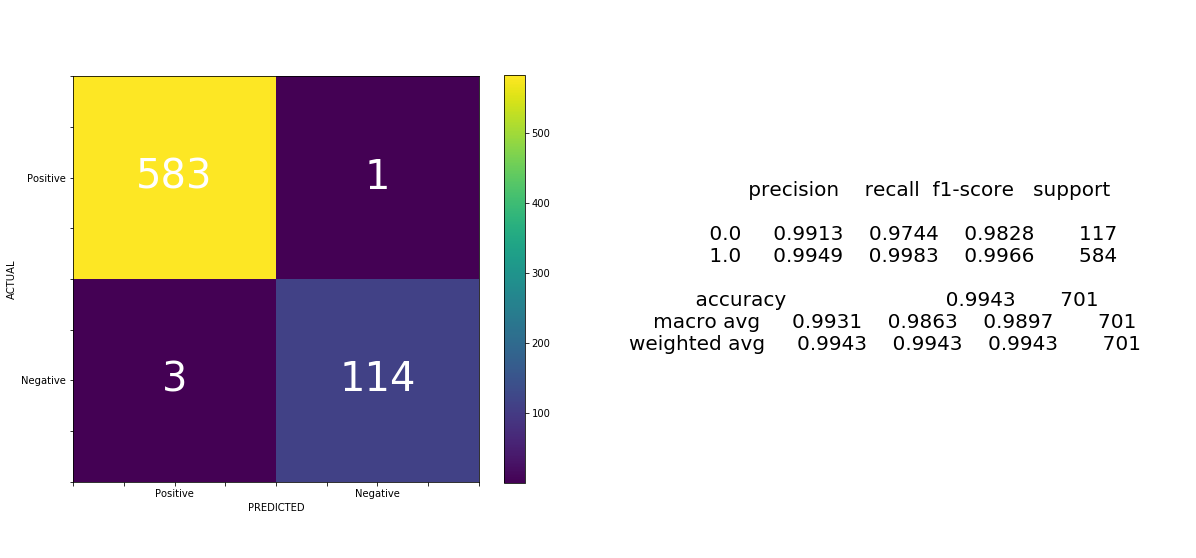

In [12]:
plot_confusion_matrix(model_1, X_val, Y_val)

We see that this model is performing well but it has a slight tendency to predict anomalous ecg as normal, which in this context is unacceptable.

-----

Here we train our second model and evaluate its performance. It is a simple Logistic Regression.

In [13]:
def LR():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Lambda(function=lambda x: (x-a)/(b-a),
                                     input_shape=[X_train.shape[1]]))
    model.add(tf.keras.layers.Dense(Y_train.shape[1], 
                                    activation='sigmoid', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=100,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=200,
                                                 min_delta=0.001)
    model.fit(X_train, Y_train, epochs=1000, batch_size=32, callbacks=[callback1, callback2], verbose=True, validation_data=(X_val, Y_val))
    return model

In [14]:
lr = LR()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 140)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 141       
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Train on 2799 samples, validate on 701 samples
Epoch 1/1000
2799/2799 [==============================] - 0s 145us/sample - loss: 0.2801 - binary_accuracy: 0.8785 - val_loss: 0.1510 - val_binary_accuracy: 0.9686
Epoch 2/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1261 - binary_accuracy: 0.9671 - val_loss: 0.0918 - val_binary_accuracy: 0.9829
Epoch 3/1000
2799/2799 [==============================] - 0s 37us/sample - loss: 0.0905 - binary_accuracy: 0.9800 - val_loss: 0.0710 - val_binary_

Epoch 47/1000
2799/2799 [==============================] - 0s 37us/sample - loss: 0.0293 - binary_accuracy: 0.9907 - val_loss: 0.0330 - val_binary_accuracy: 0.9929
Epoch 48/1000
2799/2799 [==============================] - 0s 37us/sample - loss: 0.0281 - binary_accuracy: 0.9907 - val_loss: 0.0352 - val_binary_accuracy: 0.9914
Epoch 49/1000
2799/2799 [==============================] - 0s 37us/sample - loss: 0.0283 - binary_accuracy: 0.9921 - val_loss: 0.0315 - val_binary_accuracy: 0.9943
Epoch 50/1000
2799/2799 [==============================] - 0s 37us/sample - loss: 0.0280 - binary_accuracy: 0.9929 - val_loss: 0.0353 - val_binary_accuracy: 0.9914
Epoch 51/1000
2799/2799 [==============================] - 0s 36us/sample - loss: 0.0292 - binary_accuracy: 0.9918 - val_loss: 0.0303 - val_binary_accuracy: 0.9943
Epoch 52/1000
2799/2799 [==============================] - 0s 37us/sample - loss: 0.0272 - binary_accuracy: 0.9925 - val_loss: 0.0334 - val_binary_accuracy: 0.9929
Epoch 53/1000
27

Epoch 97/1000
2799/2799 [==============================] - 0s 33us/sample - loss: 0.0252 - binary_accuracy: 0.9925 - val_loss: 0.0346 - val_binary_accuracy: 0.9900
Epoch 98/1000
2799/2799 [==============================] - 0s 33us/sample - loss: 0.0250 - binary_accuracy: 0.9918 - val_loss: 0.0317 - val_binary_accuracy: 0.9943
Epoch 99/1000
2799/2799 [==============================] - 0s 34us/sample - loss: 0.0233 - binary_accuracy: 0.9921 - val_loss: 0.0391 - val_binary_accuracy: 0.9900
Epoch 100/1000
2799/2799 [==============================] - 0s 33us/sample - loss: 0.0274 - binary_accuracy: 0.9932 - val_loss: 0.0345 - val_binary_accuracy: 0.9900
Epoch 101/1000
2799/2799 [==============================] - 0s 33us/sample - loss: 0.0244 - binary_accuracy: 0.9932 - val_loss: 0.0370 - val_binary_accuracy: 0.9929
Epoch 102/1000
2799/2799 [==============================] - 0s 34us/sample - loss: 0.0253 - binary_accuracy: 0.9911 - val_loss: 0.0286 - val_binary_accuracy: 0.9943
Epoch 103/100

Epoch 147/1000
2799/2799 [==============================] - 0s 36us/sample - loss: 0.0218 - binary_accuracy: 0.9950 - val_loss: 0.0280 - val_binary_accuracy: 0.9943
Epoch 148/1000
2799/2799 [==============================] - 0s 35us/sample - loss: 0.0218 - binary_accuracy: 0.9943 - val_loss: 0.0277 - val_binary_accuracy: 0.9943
Epoch 149/1000
2799/2799 [==============================] - 0s 34us/sample - loss: 0.0208 - binary_accuracy: 0.9939 - val_loss: 0.0306 - val_binary_accuracy: 0.9929
Epoch 150/1000
2799/2799 [==============================] - 0s 34us/sample - loss: 0.0208 - binary_accuracy: 0.9929 - val_loss: 0.0309 - val_binary_accuracy: 0.9943
Epoch 151/1000
2799/2799 [==============================] - 0s 33us/sample - loss: 0.0212 - binary_accuracy: 0.9936 - val_loss: 0.0291 - val_binary_accuracy: 0.9943
Epoch 152/1000
2799/2799 [==============================] - 0s 34us/sample - loss: 0.0207 - binary_accuracy: 0.9932 - val_loss: 0.0283 - val_binary_accuracy: 0.9943
Epoch 153/

2799/2799 [==============================] - 0s 34us/sample - loss: 0.0192 - binary_accuracy: 0.9943 - val_loss: 0.0286 - val_binary_accuracy: 0.9929
Epoch 197/1000
2799/2799 [==============================] - 0s 35us/sample - loss: 0.0198 - binary_accuracy: 0.9932 - val_loss: 0.0285 - val_binary_accuracy: 0.9943
Epoch 198/1000
2799/2799 [==============================] - 0s 45us/sample - loss: 0.0205 - binary_accuracy: 0.9925 - val_loss: 0.0315 - val_binary_accuracy: 0.9929
Epoch 199/1000
2799/2799 [==============================] - 0s 47us/sample - loss: 0.0191 - binary_accuracy: 0.9946 - val_loss: 0.0290 - val_binary_accuracy: 0.9943
Epoch 200/1000
2799/2799 [==============================] - 0s 46us/sample - loss: 0.0201 - binary_accuracy: 0.9936 - val_loss: 0.0334 - val_binary_accuracy: 0.9929
Epoch 201/1000
2799/2799 [==============================] - 0s 39us/sample - loss: 0.0214 - binary_accuracy: 0.9936 - val_loss: 0.0307 - val_binary_accuracy: 0.9943
Epoch 202/1000
2799/2799 

Epoch 246/1000
2799/2799 [==============================] - 0s 34us/sample - loss: 0.0188 - binary_accuracy: 0.9932 - val_loss: 0.0283 - val_binary_accuracy: 0.9943
Epoch 247/1000
2799/2799 [==============================] - 0s 36us/sample - loss: 0.0176 - binary_accuracy: 0.9957 - val_loss: 0.0302 - val_binary_accuracy: 0.9929
Epoch 248/1000
2799/2799 [==============================] - 0s 34us/sample - loss: 0.0184 - binary_accuracy: 0.9932 - val_loss: 0.0281 - val_binary_accuracy: 0.9943
Epoch 249/1000
2799/2799 [==============================] - 0s 33us/sample - loss: 0.0201 - binary_accuracy: 0.9932 - val_loss: 0.0286 - val_binary_accuracy: 0.9943
Epoch 250/1000
2799/2799 [==============================] - 0s 39us/sample - loss: 0.0183 - binary_accuracy: 0.9943 - val_loss: 0.0301 - val_binary_accuracy: 0.9943
Epoch 251/1000
2799/2799 [==============================] - 0s 34us/sample - loss: 0.0169 - binary_accuracy: 0.9939 - val_loss: 0.0321 - val_binary_accuracy: 0.9900
Epoch 252/

2799/2799 [==============================] - 0s 34us/sample - loss: 0.0158 - binary_accuracy: 0.9946 - val_loss: 0.0284 - val_binary_accuracy: 0.9943
Epoch 296/1000
2799/2799 [==============================] - 0s 34us/sample - loss: 0.0157 - binary_accuracy: 0.9954 - val_loss: 0.0283 - val_binary_accuracy: 0.9943
Epoch 297/1000
2799/2799 [==============================] - 0s 34us/sample - loss: 0.0155 - binary_accuracy: 0.9950 - val_loss: 0.0283 - val_binary_accuracy: 0.9943
Epoch 298/1000
2799/2799 [==============================] - 0s 33us/sample - loss: 0.0159 - binary_accuracy: 0.9950 - val_loss: 0.0283 - val_binary_accuracy: 0.9943
Epoch 299/1000
2799/2799 [==============================] - 0s 34us/sample - loss: 0.0155 - binary_accuracy: 0.9954 - val_loss: 0.0282 - val_binary_accuracy: 0.9943
Epoch 300/1000
2799/2799 [==============================] - 0s 33us/sample - loss: 0.0155 - binary_accuracy: 0.9946 - val_loss: 0.0282 - val_binary_accuracy: 0.9929
Epoch 301/1000
2799/2799 

Epoch 345/1000
2799/2799 [==============================] - 0s 33us/sample - loss: 0.0155 - binary_accuracy: 0.9950 - val_loss: 0.0277 - val_binary_accuracy: 0.9943
Epoch 346/1000
2799/2799 [==============================] - 0s 32us/sample - loss: 0.0154 - binary_accuracy: 0.9950 - val_loss: 0.0278 - val_binary_accuracy: 0.9943
Epoch 347/1000
2799/2799 [==============================] - 0s 32us/sample - loss: 0.0156 - binary_accuracy: 0.9954 - val_loss: 0.0278 - val_binary_accuracy: 0.9943
Epoch 348/1000
2799/2799 [==============================] - 0s 33us/sample - loss: 0.0154 - binary_accuracy: 0.9957 - val_loss: 0.0283 - val_binary_accuracy: 0.9943
Epoch 349/1000
2799/2799 [==============================] - 0s 33us/sample - loss: 0.0162 - binary_accuracy: 0.9943 - val_loss: 0.0278 - val_binary_accuracy: 0.9943
Epoch 350/1000
2799/2799 [==============================] - 0s 36us/sample - loss: 0.0160 - binary_accuracy: 0.9954 - val_loss: 0.0279 - val_binary_accuracy: 0.9943
Epoch 351/

2799/2799 [==============================] - 0s 32us/sample - loss: 0.0152 - binary_accuracy: 0.9954 - val_loss: 0.0276 - val_binary_accuracy: 0.9943
Epoch 395/1000
2799/2799 [==============================] - 0s 33us/sample - loss: 0.0152 - binary_accuracy: 0.9954 - val_loss: 0.0276 - val_binary_accuracy: 0.9943
Epoch 396/1000
2799/2799 [==============================] - 0s 32us/sample - loss: 0.0152 - binary_accuracy: 0.9954 - val_loss: 0.0276 - val_binary_accuracy: 0.9943
Epoch 397/1000
2799/2799 [==============================] - 0s 34us/sample - loss: 0.0152 - binary_accuracy: 0.9954 - val_loss: 0.0276 - val_binary_accuracy: 0.9943
Epoch 398/1000
2799/2799 [==============================] - 0s 33us/sample - loss: 0.0152 - binary_accuracy: 0.9954 - val_loss: 0.0276 - val_binary_accuracy: 0.9943
Epoch 399/1000
2799/2799 [==============================] - 0s 32us/sample - loss: 0.0152 - binary_accuracy: 0.9954 - val_loss: 0.0276 - val_binary_accuracy: 0.9943
Epoch 400/1000
2799/2799 

Epoch 444/1000
2799/2799 [==============================] - 0s 39us/sample - loss: 0.0152 - binary_accuracy: 0.9954 - val_loss: 0.0275 - val_binary_accuracy: 0.9943
Epoch 445/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.0152 - binary_accuracy: 0.9954 - val_loss: 0.0275 - val_binary_accuracy: 0.9943
Epoch 446/1000
2799/2799 [==============================] - 0s 40us/sample - loss: 0.0152 - binary_accuracy: 0.9954 - val_loss: 0.0275 - val_binary_accuracy: 0.9943
Epoch 447/1000
2799/2799 [==============================] - 0s 36us/sample - loss: 0.0152 - binary_accuracy: 0.9954 - val_loss: 0.0275 - val_binary_accuracy: 0.9943
Epoch 448/1000
2799/2799 [==============================] - 0s 35us/sample - loss: 0.0152 - binary_accuracy: 0.9954 - val_loss: 0.0275 - val_binary_accuracy: 0.9943
Epoch 449/1000
2799/2799 [==============================] - 0s 35us/sample - loss: 0.0152 - binary_accuracy: 0.9954 - val_loss: 0.0275 - val_binary_accuracy: 0.9943
Epoch 450/

In [15]:
def Model_2():
    f1 = lr
    f2 = tf.keras.layers.Lambda(function=lambda x: tf.sign(1+tf.sign(x-0.5)))
    x0 = tf.keras.Input(shape=(X_train.shape[1]))
    x1 = f1(x0)
    x2 = f2(x1)
    model = tf.keras.Model(x0, x2) 
    return model

In [16]:
model_2 = Model_2()

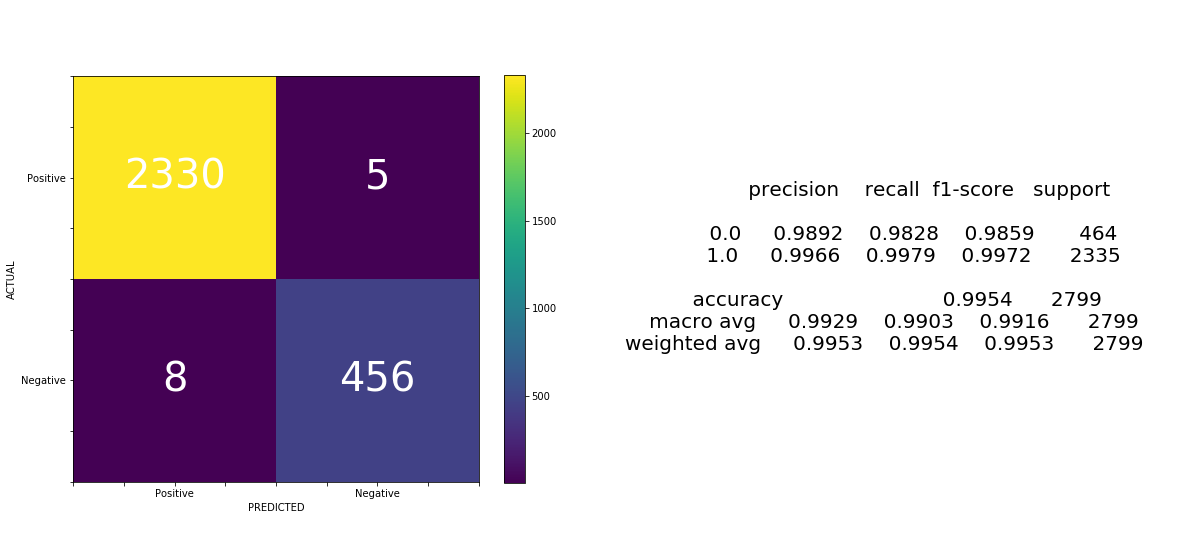

In [17]:
plot_confusion_matrix(model_2, X_train, Y_train)

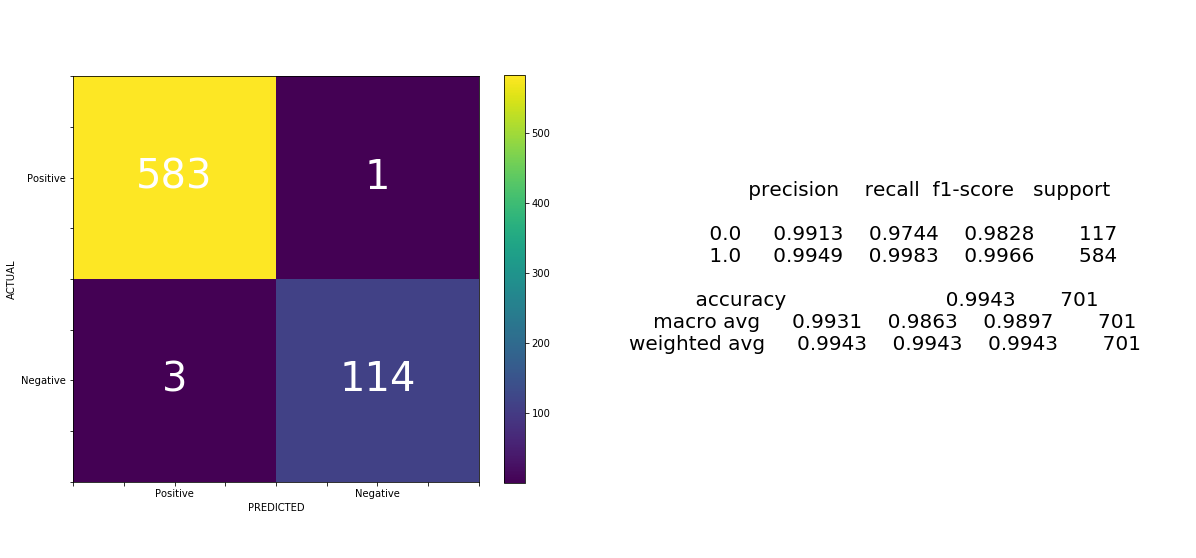

In [18]:
plot_confusion_matrix(model_2, X_val, Y_val)

We see that this model is also performing well but it has a the same tendency to predict anomalous ecg as normal, which in this context is unacceptable.

-----

Here we train our third model and evaluate its performance. It is a Neural Network.

In [19]:
def NN():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Lambda(function=lambda x: (x-a)/(b-a),
                                     input_shape=[X_train.shape[1]]))
    model.add(tf.keras.layers.Dense(units=64, 
                                    activation='relu', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(units=64, 
                                    activation='relu', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(Y_train.shape[1], 
                                    activation='sigmoid', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=100,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=200,
                                                 min_delta=0.001)
    model.fit(X_train, Y_train, epochs=1000, batch_size=32, callbacks=[callback1, callback2], verbose=True, validation_data=(X_val, Y_val))
    return model

In [20]:
nn = NN()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 140)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                9024      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 13,249
Trainable params: 13,249
Non-trainable params: 0
__________________________________________________

Epoch 44/1000
2799/2799 [==============================] - 0s 48us/sample - loss: 0.1851 - binary_accuracy: 0.9210 - val_loss: 0.0302 - val_binary_accuracy: 0.9886
Epoch 45/1000
2799/2799 [==============================] - 0s 42us/sample - loss: 0.2080 - binary_accuracy: 0.9085 - val_loss: 0.0281 - val_binary_accuracy: 0.9900
Epoch 46/1000
2799/2799 [==============================] - 0s 44us/sample - loss: 0.1952 - binary_accuracy: 0.9203 - val_loss: 0.0360 - val_binary_accuracy: 0.9886
Epoch 47/1000
2799/2799 [==============================] - 0s 44us/sample - loss: 0.2051 - binary_accuracy: 0.9103 - val_loss: 0.0317 - val_binary_accuracy: 0.9886
Epoch 48/1000
2799/2799 [==============================] - 0s 56us/sample - loss: 0.1964 - binary_accuracy: 0.9178 - val_loss: 0.0286 - val_binary_accuracy: 0.9914
Epoch 49/1000
2799/2799 [==============================] - 0s 45us/sample - loss: 0.1950 - binary_accuracy: 0.9096 - val_loss: 0.0387 - val_binary_accuracy: 0.9900
Epoch 50/1000
27

Epoch 94/1000
2799/2799 [==============================] - 0s 39us/sample - loss: 0.1848 - binary_accuracy: 0.9196 - val_loss: 0.0292 - val_binary_accuracy: 0.9886
Epoch 95/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.2012 - binary_accuracy: 0.9093 - val_loss: 0.0327 - val_binary_accuracy: 0.9900
Epoch 96/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1991 - binary_accuracy: 0.9103 - val_loss: 0.0326 - val_binary_accuracy: 0.9886
Epoch 97/1000
2799/2799 [==============================] - 0s 39us/sample - loss: 0.1873 - binary_accuracy: 0.9171 - val_loss: 0.0274 - val_binary_accuracy: 0.9886
Epoch 98/1000
2799/2799 [==============================] - 0s 40us/sample - loss: 0.1851 - binary_accuracy: 0.9150 - val_loss: 0.0310 - val_binary_accuracy: 0.9886
Epoch 99/1000
2799/2799 [==============================] - 0s 37us/sample - loss: 0.2043 - binary_accuracy: 0.9071 - val_loss: 0.0279 - val_binary_accuracy: 0.9886
Epoch 100/1000
2

Epoch 144/1000
2799/2799 [==============================] - 0s 37us/sample - loss: 0.1913 - binary_accuracy: 0.9114 - val_loss: 0.0351 - val_binary_accuracy: 0.9900
Epoch 145/1000
2799/2799 [==============================] - 0s 37us/sample - loss: 0.1901 - binary_accuracy: 0.9118 - val_loss: 0.0358 - val_binary_accuracy: 0.9900
Epoch 146/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1835 - binary_accuracy: 0.9121 - val_loss: 0.0361 - val_binary_accuracy: 0.9900
Epoch 147/1000
2799/2799 [==============================] - 0s 37us/sample - loss: 0.1928 - binary_accuracy: 0.9093 - val_loss: 0.0374 - val_binary_accuracy: 0.9900
Epoch 148/1000
2799/2799 [==============================] - 0s 37us/sample - loss: 0.1948 - binary_accuracy: 0.9132 - val_loss: 0.0359 - val_binary_accuracy: 0.9900
Epoch 149/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1750 - binary_accuracy: 0.9185 - val_loss: 0.0349 - val_binary_accuracy: 0.9900
Epoch 150/

2799/2799 [==============================] - 0s 39us/sample - loss: 0.1832 - binary_accuracy: 0.9210 - val_loss: 0.0426 - val_binary_accuracy: 0.9900
Epoch 194/1000
2799/2799 [==============================] - 0s 39us/sample - loss: 0.1892 - binary_accuracy: 0.9103 - val_loss: 0.0455 - val_binary_accuracy: 0.9900
Epoch 195/1000
2799/2799 [==============================] - 0s 41us/sample - loss: 0.1883 - binary_accuracy: 0.9128 - val_loss: 0.0454 - val_binary_accuracy: 0.9900
Epoch 196/1000
2799/2799 [==============================] - 0s 51us/sample - loss: 0.1877 - binary_accuracy: 0.9135 - val_loss: 0.0451 - val_binary_accuracy: 0.9900
Epoch 197/1000
2799/2799 [==============================] - 0s 51us/sample - loss: 0.1849 - binary_accuracy: 0.9118 - val_loss: 0.0438 - val_binary_accuracy: 0.9900
Epoch 198/1000
2799/2799 [==============================] - 0s 54us/sample - loss: 0.1797 - binary_accuracy: 0.9153 - val_loss: 0.0435 - val_binary_accuracy: 0.9900
Epoch 199/1000
2799/2799 

Epoch 243/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1966 - binary_accuracy: 0.9068 - val_loss: 0.0464 - val_binary_accuracy: 0.9900
Epoch 244/1000
2799/2799 [==============================] - 0s 44us/sample - loss: 0.1844 - binary_accuracy: 0.9118 - val_loss: 0.0462 - val_binary_accuracy: 0.9900
Epoch 245/1000
2799/2799 [==============================] - 0s 39us/sample - loss: 0.1801 - binary_accuracy: 0.9150 - val_loss: 0.0462 - val_binary_accuracy: 0.9900
Epoch 246/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1885 - binary_accuracy: 0.9096 - val_loss: 0.0462 - val_binary_accuracy: 0.9900
Epoch 247/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1947 - binary_accuracy: 0.9103 - val_loss: 0.0462 - val_binary_accuracy: 0.9900
Epoch 248/1000
2799/2799 [==============================] - 0s 37us/sample - loss: 0.1874 - binary_accuracy: 0.9103 - val_loss: 0.0463 - val_binary_accuracy: 0.9900
Epoch 249/

2799/2799 [==============================] - 0s 42us/sample - loss: 0.1877 - binary_accuracy: 0.9132 - val_loss: 0.0494 - val_binary_accuracy: 0.9900
Epoch 293/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1872 - binary_accuracy: 0.9093 - val_loss: 0.0493 - val_binary_accuracy: 0.9900
Epoch 294/1000
2799/2799 [==============================] - 0s 40us/sample - loss: 0.1867 - binary_accuracy: 0.9125 - val_loss: 0.0496 - val_binary_accuracy: 0.9900
Epoch 295/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1851 - binary_accuracy: 0.9114 - val_loss: 0.0497 - val_binary_accuracy: 0.9900
Epoch 296/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1904 - binary_accuracy: 0.9082 - val_loss: 0.0495 - val_binary_accuracy: 0.9900
Epoch 297/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1864 - binary_accuracy: 0.9085 - val_loss: 0.0494 - val_binary_accuracy: 0.9900
Epoch 298/1000
2799/2799 

Epoch 342/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1865 - binary_accuracy: 0.9107 - val_loss: 0.0511 - val_binary_accuracy: 0.9900
Epoch 343/1000
2799/2799 [==============================] - 0s 37us/sample - loss: 0.1841 - binary_accuracy: 0.9171 - val_loss: 0.0509 - val_binary_accuracy: 0.9900
Epoch 344/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1843 - binary_accuracy: 0.9146 - val_loss: 0.0491 - val_binary_accuracy: 0.9900
Epoch 345/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1872 - binary_accuracy: 0.9150 - val_loss: 0.0496 - val_binary_accuracy: 0.9900
Epoch 346/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1870 - binary_accuracy: 0.9093 - val_loss: 0.0495 - val_binary_accuracy: 0.9900
Epoch 347/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1888 - binary_accuracy: 0.9100 - val_loss: 0.0493 - val_binary_accuracy: 0.9900
Epoch 348/

2799/2799 [==============================] - 0s 38us/sample - loss: 0.1814 - binary_accuracy: 0.9146 - val_loss: 0.0517 - val_binary_accuracy: 0.9900
Epoch 392/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1848 - binary_accuracy: 0.9157 - val_loss: 0.0521 - val_binary_accuracy: 0.9900
Epoch 393/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1821 - binary_accuracy: 0.9178 - val_loss: 0.0522 - val_binary_accuracy: 0.9900
Epoch 394/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1924 - binary_accuracy: 0.9071 - val_loss: 0.0520 - val_binary_accuracy: 0.9900
Epoch 395/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1843 - binary_accuracy: 0.9135 - val_loss: 0.0522 - val_binary_accuracy: 0.9900
Epoch 396/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1893 - binary_accuracy: 0.9089 - val_loss: 0.0518 - val_binary_accuracy: 0.9900
Epoch 397/1000
2799/2799 

Epoch 441/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1746 - binary_accuracy: 0.9228 - val_loss: 0.0532 - val_binary_accuracy: 0.9900
Epoch 442/1000
2799/2799 [==============================] - 0s 39us/sample - loss: 0.1823 - binary_accuracy: 0.9135 - val_loss: 0.0528 - val_binary_accuracy: 0.9900
Epoch 443/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1873 - binary_accuracy: 0.9114 - val_loss: 0.0529 - val_binary_accuracy: 0.9900
Epoch 444/1000
2799/2799 [==============================] - 0s 39us/sample - loss: 0.1887 - binary_accuracy: 0.9075 - val_loss: 0.0529 - val_binary_accuracy: 0.9900
Epoch 445/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1831 - binary_accuracy: 0.9121 - val_loss: 0.0532 - val_binary_accuracy: 0.9900
Epoch 446/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1869 - binary_accuracy: 0.9114 - val_loss: 0.0532 - val_binary_accuracy: 0.9900
Epoch 447/

2799/2799 [==============================] - 0s 38us/sample - loss: 0.1933 - binary_accuracy: 0.9096 - val_loss: 0.0548 - val_binary_accuracy: 0.9900
Epoch 491/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1812 - binary_accuracy: 0.9143 - val_loss: 0.0549 - val_binary_accuracy: 0.9900
Epoch 492/1000
2799/2799 [==============================] - 0s 39us/sample - loss: 0.1870 - binary_accuracy: 0.9139 - val_loss: 0.0554 - val_binary_accuracy: 0.9900
Epoch 493/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1760 - binary_accuracy: 0.9193 - val_loss: 0.0558 - val_binary_accuracy: 0.9900
Epoch 494/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1878 - binary_accuracy: 0.9150 - val_loss: 0.0555 - val_binary_accuracy: 0.9900
Epoch 495/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1812 - binary_accuracy: 0.9175 - val_loss: 0.0560 - val_binary_accuracy: 0.9900
Epoch 496/1000
2799/2799 

Epoch 540/1000
2799/2799 [==============================] - 0s 62us/sample - loss: 0.1905 - binary_accuracy: 0.9064 - val_loss: 0.0543 - val_binary_accuracy: 0.9900
Epoch 541/1000
2799/2799 [==============================] - 0s 42us/sample - loss: 0.1957 - binary_accuracy: 0.9078 - val_loss: 0.0543 - val_binary_accuracy: 0.9900
Epoch 542/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1798 - binary_accuracy: 0.9125 - val_loss: 0.0541 - val_binary_accuracy: 0.9900
Epoch 543/1000
2799/2799 [==============================] - 0s 39us/sample - loss: 0.1800 - binary_accuracy: 0.9150 - val_loss: 0.0555 - val_binary_accuracy: 0.9900
Epoch 544/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1908 - binary_accuracy: 0.9100 - val_loss: 0.0556 - val_binary_accuracy: 0.9900
Epoch 545/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1861 - binary_accuracy: 0.9128 - val_loss: 0.0556 - val_binary_accuracy: 0.9900
Epoch 546/

2799/2799 [==============================] - 0s 39us/sample - loss: 0.1817 - binary_accuracy: 0.9157 - val_loss: 0.0569 - val_binary_accuracy: 0.9900
Epoch 590/1000
2799/2799 [==============================] - 0s 39us/sample - loss: 0.1908 - binary_accuracy: 0.9078 - val_loss: 0.0572 - val_binary_accuracy: 0.9900
Epoch 591/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1805 - binary_accuracy: 0.9164 - val_loss: 0.0564 - val_binary_accuracy: 0.9900
Epoch 592/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1821 - binary_accuracy: 0.9157 - val_loss: 0.0570 - val_binary_accuracy: 0.9900
Epoch 593/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1892 - binary_accuracy: 0.9118 - val_loss: 0.0571 - val_binary_accuracy: 0.9900
Epoch 594/1000
2799/2799 [==============================] - 0s 39us/sample - loss: 0.1819 - binary_accuracy: 0.9200 - val_loss: 0.0572 - val_binary_accuracy: 0.9900
Epoch 595/1000
2799/2799 

Epoch 639/1000
2799/2799 [==============================] - 0s 41us/sample - loss: 0.1835 - binary_accuracy: 0.9132 - val_loss: 0.0587 - val_binary_accuracy: 0.9900
Epoch 640/1000
2799/2799 [==============================] - 0s 40us/sample - loss: 0.1851 - binary_accuracy: 0.9139 - val_loss: 0.0582 - val_binary_accuracy: 0.9900
Epoch 641/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1859 - binary_accuracy: 0.9128 - val_loss: 0.0579 - val_binary_accuracy: 0.9900
Epoch 642/1000
2799/2799 [==============================] - 0s 40us/sample - loss: 0.1845 - binary_accuracy: 0.9107 - val_loss: 0.0578 - val_binary_accuracy: 0.9900
Epoch 643/1000
2799/2799 [==============================] - 0s 40us/sample - loss: 0.1842 - binary_accuracy: 0.9168 - val_loss: 0.0581 - val_binary_accuracy: 0.9900
Epoch 644/1000
2799/2799 [==============================] - 0s 39us/sample - loss: 0.1901 - binary_accuracy: 0.9114 - val_loss: 0.0582 - val_binary_accuracy: 0.9900
Epoch 645/

2799/2799 [==============================] - 0s 38us/sample - loss: 0.1944 - binary_accuracy: 0.9053 - val_loss: 0.0589 - val_binary_accuracy: 0.9900
Epoch 689/1000
2799/2799 [==============================] - 0s 39us/sample - loss: 0.1826 - binary_accuracy: 0.9182 - val_loss: 0.0591 - val_binary_accuracy: 0.9900
Epoch 690/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1901 - binary_accuracy: 0.9143 - val_loss: 0.0588 - val_binary_accuracy: 0.9900
Epoch 691/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1843 - binary_accuracy: 0.9125 - val_loss: 0.0588 - val_binary_accuracy: 0.9900
Epoch 692/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1798 - binary_accuracy: 0.9185 - val_loss: 0.0589 - val_binary_accuracy: 0.9900
Epoch 693/1000
2799/2799 [==============================] - 0s 38us/sample - loss: 0.1739 - binary_accuracy: 0.9196 - val_loss: 0.0588 - val_binary_accuracy: 0.9900
Epoch 694/1000
2799/2799 

In [21]:
def Model_3():
    f1 = nn
    f2 = tf.keras.layers.Lambda(function=lambda x: tf.sign(1+tf.sign(x-0.5)))
    x0 = tf.keras.Input(shape=(X_train.shape[1]))
    x1 = f1(x0)
    x2 = f2(x1)
    model = tf.keras.Model(x0, x2) 
    return model

In [22]:
model_3 = Model_3()

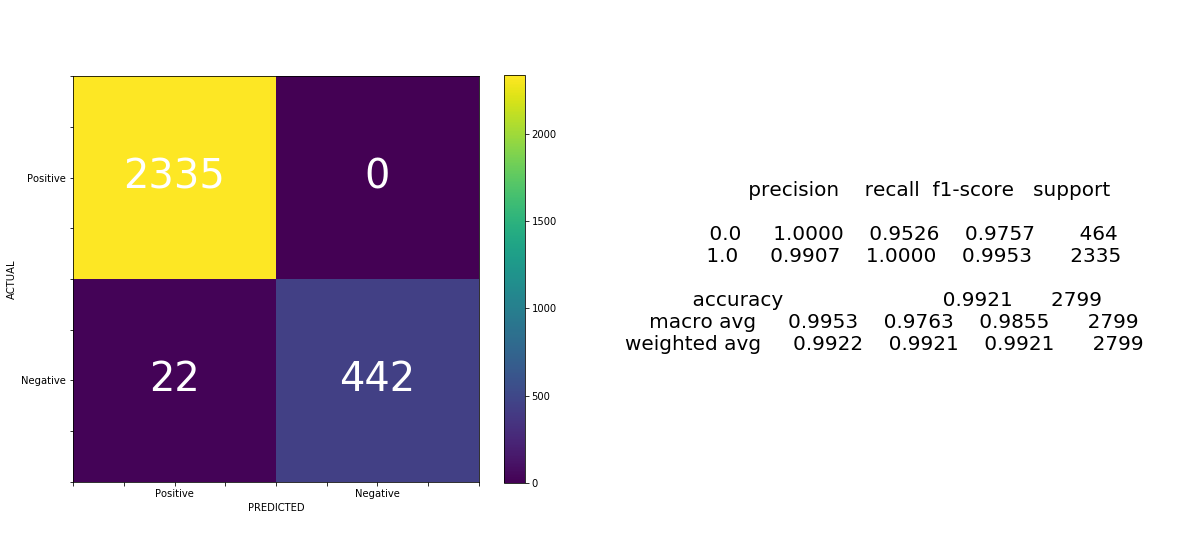

In [23]:
plot_confusion_matrix(model_3, X_train, Y_train)

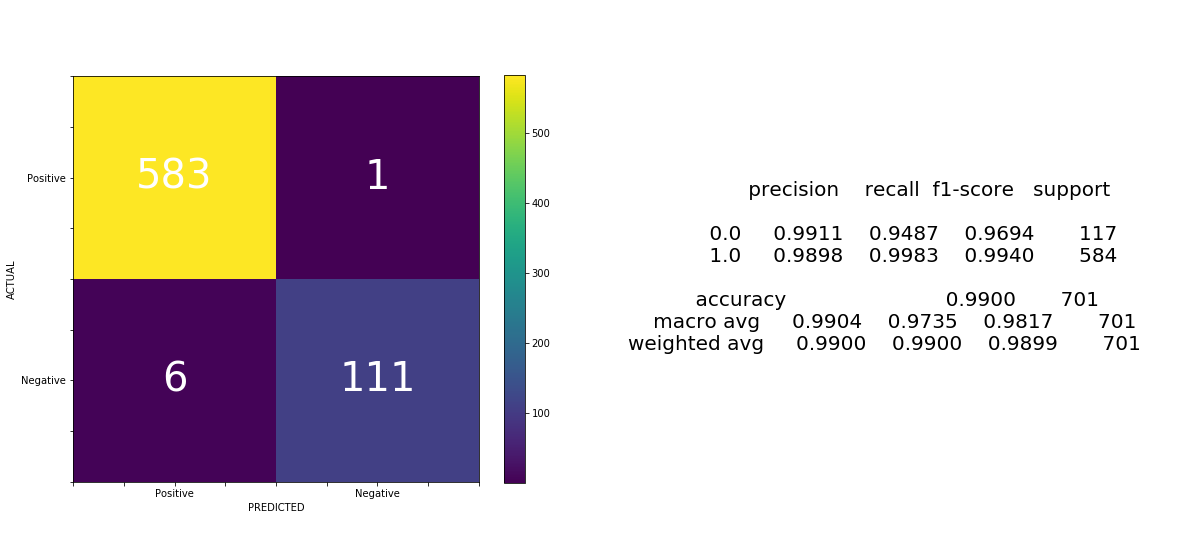

In [24]:
plot_confusion_matrix(model_3, X_val, Y_val)

We see that this model is performing much worse than the last ones, with an exacerbated tendency to predict anomalous ecg as normal.

-----

Here we train our forth model and evaluate its performance. It is a Deep Neural Network with Conv1D and LSTM.

In [25]:
def DNN():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Lambda(function=lambda x: (x-a)/(b-a),
                                     input_shape=[X_train.shape[1]]))
    model.add(tf.keras.layers.Lambda(function=lambda x: tf.expand_dims(x, axis=-1)))
    model.add(tf.keras.layers.Conv1D(filters=32, 
                                     kernel_size=5, 
                                     strides=1,
                                     padding='causal',
                                     activation='relu',
                                     kernel_initializer='glorot_uniform',
                                     bias_initializer='zeros'))
    model.add(tf.keras.layers.LSTM(units=32,
                              activation='tanh',
                              recurrent_activation='sigmoid',
                              kernel_initializer='glorot_uniform',
                              bias_initializer='zeros',
                              recurrent_initializer='zeros',
                              return_sequences=False,
                              return_state = False))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(units=16, 
                                    activation='relu', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
    model.add(tf.keras.layers.Dense(Y_train.shape[1], 
                                    activation='sigmoid', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=10,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=20,
                                                 min_delta=0.001)
    model.fit(X_train, Y_train, epochs=100, batch_size=32, callbacks=[callback1, callback2], verbose=True, validation_data=(X_val, Y_val))
    return model

In [26]:
dnn = DNN()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 140)               0         
_________________________________________________________________
lambda_5 (Lambda)            (None, 140, 1)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 140, 32)           192       
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

2799/2799 [==============================] - 4s 1ms/sample - loss: 0.0254 - binary_accuracy: 0.9921 - val_loss: 0.0390 - val_binary_accuracy: 0.9929
Epoch 44/100
2799/2799 [==============================] - 4s 1ms/sample - loss: 0.0240 - binary_accuracy: 0.9939 - val_loss: 0.0369 - val_binary_accuracy: 0.9943
Epoch 45/100
2799/2799 [==============================] - 4s 1ms/sample - loss: 0.0240 - binary_accuracy: 0.9939 - val_loss: 0.0364 - val_binary_accuracy: 0.9914
Epoch 46/100
2799/2799 [==============================] - 4s 1ms/sample - loss: 0.0226 - binary_accuracy: 0.9957 - val_loss: 0.0376 - val_binary_accuracy: 0.9929
Epoch 47/100
2799/2799 [==============================] - 4s 1ms/sample - loss: 0.0247 - binary_accuracy: 0.9939 - val_loss: 0.0431 - val_binary_accuracy: 0.9914
Epoch 48/100
2799/2799 [==============================] - 4s 1ms/sample - loss: 0.0229 - binary_accuracy: 0.9936 - val_loss: 0.0391 - val_binary_accuracy: 0.9929
Epoch 49/100
2799/2799 [=================

In [27]:
def Model_4():
    f1 = dnn
    f2 = tf.keras.layers.Lambda(function=lambda x: tf.sign(1+tf.sign(x-0.5)))
    x0 = tf.keras.Input(shape=(X_train.shape[1]))
    x1 = f1(x0)
    x2 = f2(x1)
    model = tf.keras.Model(x0, x2) 
    return model

In [28]:
model_4 = Model_4()

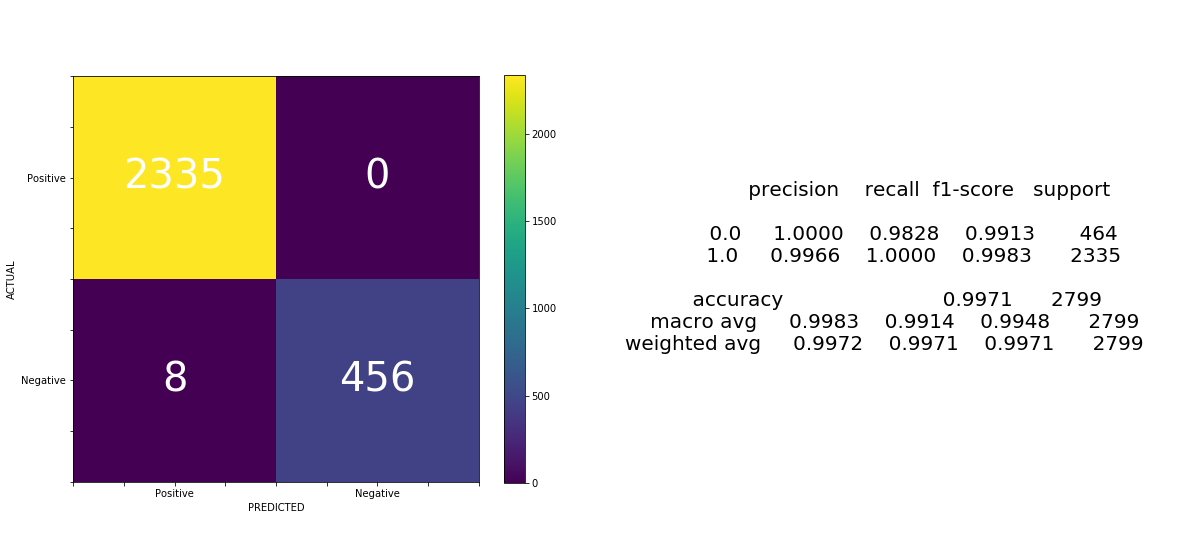

In [29]:
plot_confusion_matrix(model_4, X_train, Y_train)

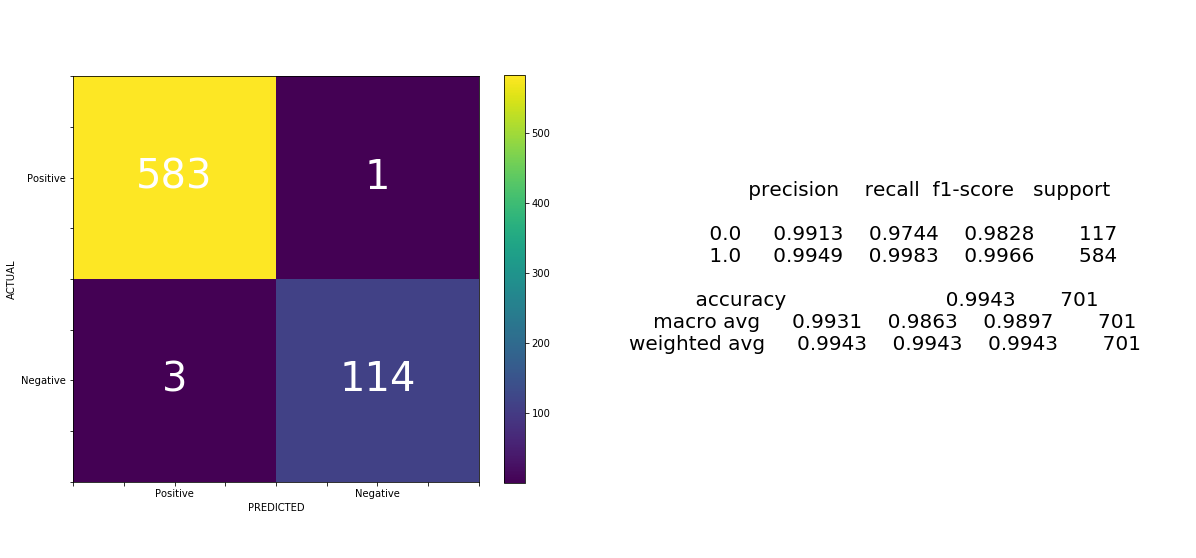

In [30]:
plot_confusion_matrix(model_4, X_val, Y_val)

We see that this model is performing well but it also has the same tendency to predict anomalous ecg as normal, which in this context is unacceptable.

-----

Here we train our fifth and last model and evaluate its performance. It is a model based on an Autoencoder.

In [31]:
Z_train = data.query('label == 1.0').iloc[:2335,:-1].values
Z_val = data.query('label == 0.0').iloc[:464,:-1].values

In [32]:
d = np.max(Z_train, axis=0) + 0.00000000001
c = np.min(Z_train, axis=0) - 0.00000000001

In [33]:
def AE():
    f1 = tf.keras.layers.Lambda(function=lambda x: (x-c)/(d-c))
    f2 = tf.keras.layers.Dense(units=64,
                               activation='relu', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f3 = tf.keras.layers.Dense(units=32,
                               activation='relu', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f4 = tf.keras.layers.Dense(units=16,
                               activation='relu', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f5 = tf.keras.layers.Dense(units=32,
                               activation='relu', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f6 = tf.keras.layers.Dense(units=64,
                               activation='relu', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f7 = tf.keras.layers.Dense(units=Z_train.shape[1],
                               activation='sigmoid', 
                               kernel_initializer='he_uniform',
                               bias_initializer='zeros')
    f8 = tf.keras.layers.Lambda(function=lambda x: x*(d-c)+c)
    x0 = tf.keras.Input(shape=(Z_train.shape[1]))
    x1 = f1(x0)
    x2 = f2(x1)
    x3 = f3(x2)
    x4 = f4(x3)
    x5 = f5(x4)
    x6 = f6(x5)
    x7 = f7(x6)
    x8 = f8(x7)
    ae = tf.keras.Model(x0, x8) 
    y0 = tf.keras.Input(shape=(Z_train.shape[1]))
    y1 = f1(y0)
    y2 = f2(y1)
    y3 = f3(y2)
    y4 = f4(y3)
    encoder = tf.keras.Model(y0, y4)
    z0 = tf.keras.Input(shape=(16))
    z1 = f5(z0)
    z2 = f6(z1)
    z3 = f7(z2)
    z4 = f8(z3)
    decoder = tf.keras.Model(z0, z4)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    ae.compile(loss='mae', optimizer=optimizer)
    ae.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=50,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=200,
                                                 min_delta=0.001)
    ae.fit(Z_train, Z_train, epochs=1000, batch_size=64, callbacks=[callback1, callback2], validation_data=(Z_val, Z_val))
    return ae, encoder, decoder

In [34]:
ae, encoder, decoder = AE()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 140)]             0         
_________________________________________________________________
lambda_7 (Lambda)            (None, 140)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                9024      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112

2335/2335 [==============================] - 0s 29us/sample - loss: 0.1053 - val_loss: 0.4622
Epoch 63/1000
2335/2335 [==============================] - 0s 29us/sample - loss: 0.1039 - val_loss: 0.4683
Epoch 64/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.1053 - val_loss: 0.4620
Epoch 65/1000
2335/2335 [==============================] - 0s 26us/sample - loss: 0.1054 - val_loss: 0.4719
Epoch 66/1000
2335/2335 [==============================] - 0s 28us/sample - loss: 0.1035 - val_loss: 0.4639
Epoch 67/1000
2335/2335 [==============================] - 0s 27us/sample - loss: 0.1050 - val_loss: 0.4709
Epoch 68/1000
2335/2335 [==============================] - 0s 27us/sample - loss: 0.1034 - val_loss: 0.4724
Epoch 69/1000
2335/2335 [==============================] - 0s 26us/sample - loss: 0.1026 - val_loss: 0.4831
Epoch 70/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.1028 - val_loss: 0.4808
Epoch 71/1000
2335/2335 [=================

2335/2335 [==============================] - 0s 29us/sample - loss: 0.0943 - val_loss: 0.4902
Epoch 138/1000
2335/2335 [==============================] - 0s 27us/sample - loss: 0.0960 - val_loss: 0.4684
Epoch 139/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0948 - val_loss: 0.4902
Epoch 140/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0942 - val_loss: 0.4721
Epoch 141/1000
2335/2335 [==============================] - 0s 26us/sample - loss: 0.0925 - val_loss: 0.4611
Epoch 142/1000
2335/2335 [==============================] - 0s 24us/sample - loss: 0.0929 - val_loss: 0.4662
Epoch 143/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0935 - val_loss: 0.4762
Epoch 144/1000
2335/2335 [==============================] - 0s 29us/sample - loss: 0.0926 - val_loss: 0.4691
Epoch 145/1000
2335/2335 [==============================] - 0s 28us/sample - loss: 0.0936 - val_loss: 0.4758
Epoch 146/1000
2335/2335 [========

2335/2335 [==============================] - 0s 26us/sample - loss: 0.0915 - val_loss: 0.4618
Epoch 213/1000
2335/2335 [==============================] - 0s 54us/sample - loss: 0.0924 - val_loss: 0.4636
Epoch 214/1000
2335/2335 [==============================] - 0s 34us/sample - loss: 0.0902 - val_loss: 0.4693
Epoch 215/1000
2335/2335 [==============================] - 0s 28us/sample - loss: 0.0902 - val_loss: 0.4636
Epoch 216/1000
2335/2335 [==============================] - 0s 24us/sample - loss: 0.0925 - val_loss: 0.4642
Epoch 217/1000
2335/2335 [==============================] - 0s 27us/sample - loss: 0.0913 - val_loss: 0.4644
Epoch 218/1000
2335/2335 [==============================] - 0s 24us/sample - loss: 0.0901 - val_loss: 0.4692
Epoch 219/1000
2335/2335 [==============================] - 0s 28us/sample - loss: 0.0932 - val_loss: 0.4798
Epoch 220/1000
2335/2335 [==============================] - 0s 26us/sample - loss: 0.0965 - val_loss: 0.4804
Epoch 221/1000
2335/2335 [========

2335/2335 [==============================] - 0s 27us/sample - loss: 0.0837 - val_loss: 0.4575
Epoch 288/1000
2335/2335 [==============================] - 0s 28us/sample - loss: 0.0837 - val_loss: 0.4575
Epoch 289/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0837 - val_loss: 0.4575
Epoch 290/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0837 - val_loss: 0.4572
Epoch 291/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0837 - val_loss: 0.4573
Epoch 292/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0837 - val_loss: 0.4578
Epoch 293/1000
2335/2335 [==============================] - 0s 26us/sample - loss: 0.0837 - val_loss: 0.4574
Epoch 294/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0837 - val_loss: 0.4575
Epoch 295/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0837 - val_loss: 0.4572
Epoch 296/1000
2335/2335 [========

2335/2335 [==============================] - 0s 26us/sample - loss: 0.0836 - val_loss: 0.4582
Epoch 363/1000
2335/2335 [==============================] - 0s 24us/sample - loss: 0.0836 - val_loss: 0.4579
Epoch 364/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0836 - val_loss: 0.4578
Epoch 365/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0836 - val_loss: 0.4574
Epoch 366/1000
2335/2335 [==============================] - 0s 26us/sample - loss: 0.0836 - val_loss: 0.4580
Epoch 367/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0836 - val_loss: 0.4570
Epoch 368/1000
2335/2335 [==============================] - 0s 26us/sample - loss: 0.0836 - val_loss: 0.4579
Epoch 369/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0836 - val_loss: 0.4576
Epoch 370/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0836 - val_loss: 0.4579
Epoch 371/1000
2335/2335 [========

2335/2335 [==============================] - 0s 24us/sample - loss: 0.0835 - val_loss: 0.4580
Epoch 438/1000
2335/2335 [==============================] - 0s 24us/sample - loss: 0.0835 - val_loss: 0.4583
Epoch 439/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0835 - val_loss: 0.4583
Epoch 440/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0835 - val_loss: 0.4576
Epoch 441/1000
2335/2335 [==============================] - 0s 27us/sample - loss: 0.0835 - val_loss: 0.4579
Epoch 442/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0835 - val_loss: 0.4579
Epoch 443/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0835 - val_loss: 0.4573
Epoch 444/1000
2335/2335 [==============================] - 0s 25us/sample - loss: 0.0835 - val_loss: 0.4577
Epoch 445/1000
2335/2335 [==============================] - 0s 28us/sample - loss: 0.0835 - val_loss: 0.4584
Epoch 446/1000
2335/2335 [========

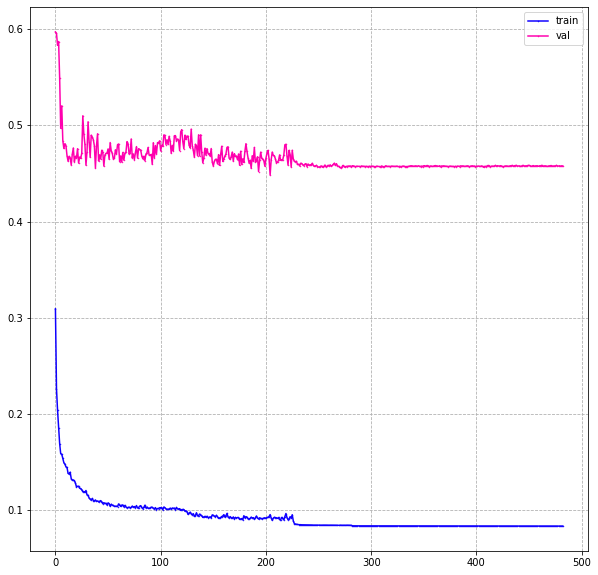

In [35]:
loss = ae.history.history['loss']
val_loss = ae.history.history['val_loss']
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.grid(b=True, linestyle='--')
ax.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='-', label='train')
ax.plot(val_loss, marker='.', color='#FF00AE', markersize=1, linestyle='-', label='val')
ax.legend()

In [36]:
Z_train_pred = ae.predict(Z_train)
Z_val_pred = ae.predict(Z_val)

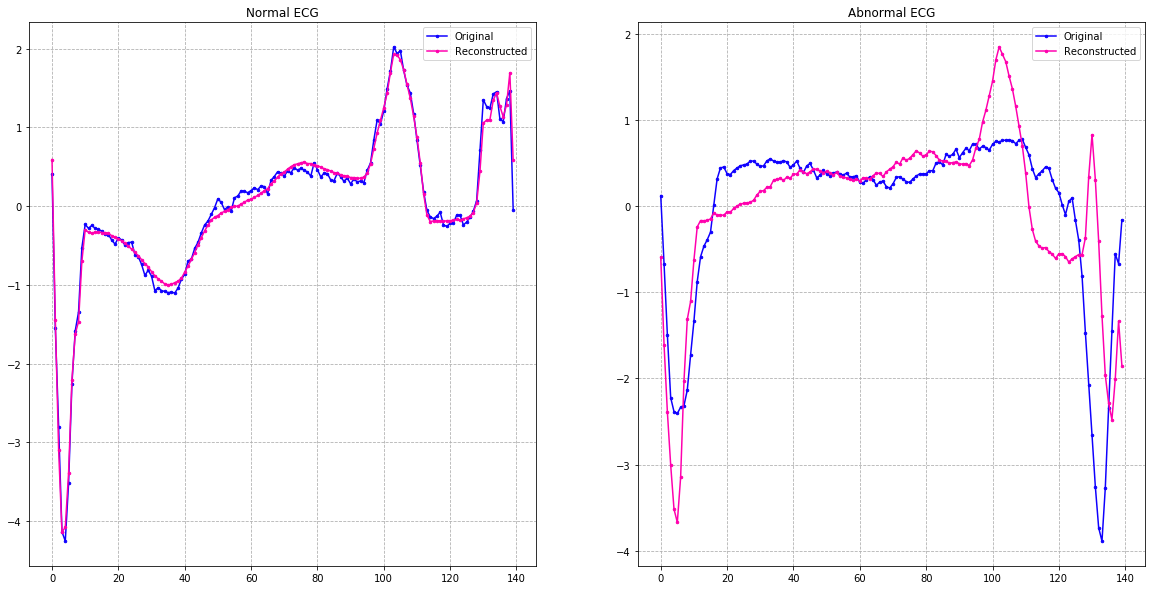

In [37]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax1.grid(b=True, linestyle='--')
ax1.set_title('Normal ECG')
ax1.plot(Z_train[0,:], marker='.', color='#0F00FF', markersize=5, linestyle='-', label='Original')
ax1.plot(Z_train_pred[0,:], marker='.', color='#FF00AE', markersize=5, linestyle='-', label='Reconstructed')
ax1.legend()
ax2 = fig.add_subplot(1, 2, 2)
ax2.grid(b=True, linestyle='--')
ax2.set_title('Abnormal ECG')
ax2.plot(Z_val[0,:], marker='.', color='#0F00FF', markersize=5, linestyle='-', label='Original')
ax2.plot(Z_val_pred[0,:], marker='.', color='#FF00AE', markersize=5, linestyle='-', label='Reconstructed')
ax2.legend()

(array([ 4.,  2.,  3.,  4.,  4.,  5.,  3.,  8.,  6.,  8., 24., 40., 50.,
        52., 43., 30., 28., 25., 24., 17., 10., 12., 14.,  7.,  5.,  5.,
         3.,  4.,  7.,  5.,  1.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  1.,  1.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([0.21513746, 0.23056948, 0.24600151, 0.26143354, 0.27686556,
        0.29229759, 0.30772961, 0.32316164, 0.33859367, 0.35402569,
        0.36945772, 0.38488975, 0.40032177, 0.4157538 , 0.43118583,
        0.44661785, 0.46204988, 0.4774819 , 0.49291393, 0.50834596,
        0.52377798, 0.53921001, 0.55464204, 0.57007406, 0.58550609,
        0.60093811, 0.61637014, 0.63180217, 0.64723419, 0.66266622,
        0.67809825, 0.69353027, 0.7089623 , 0.72439433, 0.73982635,
        0.75525838, 0.7706904 , 0.78612243, 0.80155446, 0.81698648,
        0.83241851, 0.84785054, 0.86328256, 0.87871459, 0.89414661,
        0.90957864, 0.92501067, 0.94044269, 0.95587472, 0.97130675,
        0.98673877]),
 <a list of 50

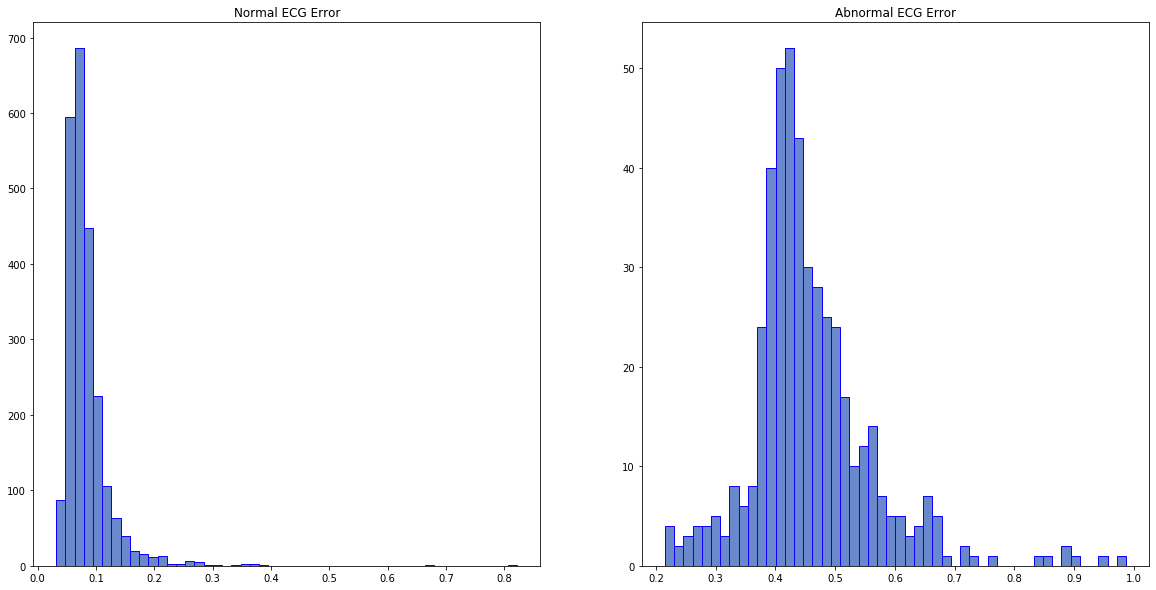

In [38]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Normal ECG Error')
ax1.hist(np.mean(np.abs(Z_train-Z_train_pred), axis=1), bins=50, color='#6A89CC', edgecolor='#0F00FF')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Abnormal ECG Error')
ax2.hist(np.mean(np.abs(Z_val-Z_val_pred), axis=1), bins=50, color='#6A89CC', edgecolor='#0F00FF')

In [39]:
mae = np.mean(np.abs(Z_train-Z_train_pred), axis=1)
threshold = np.mean(mae) + np.std(mae)

In [40]:
def Model_5():
    f1 = ae
    f2 = tf.keras.layers.Subtract()
    f3 = tf.keras.layers.Lambda(function=lambda x: tf.reduce_mean(tf.math.abs(x), axis=1, keepdims=True))
    f4 = tf.keras.layers.Lambda(function=lambda x: tf.sign(1+tf.sign(threshold-x)))
    x0 = tf.keras.Input(shape=(X_train.shape[1]))
    x1 = f1(x0)
    x2 = f2([x0,x1])
    x3 = f3(x2)
    x4 = f4(x3)
    model = tf.keras.Model(x0, x4) 
    return model

In [41]:
model_5 = Model_5()

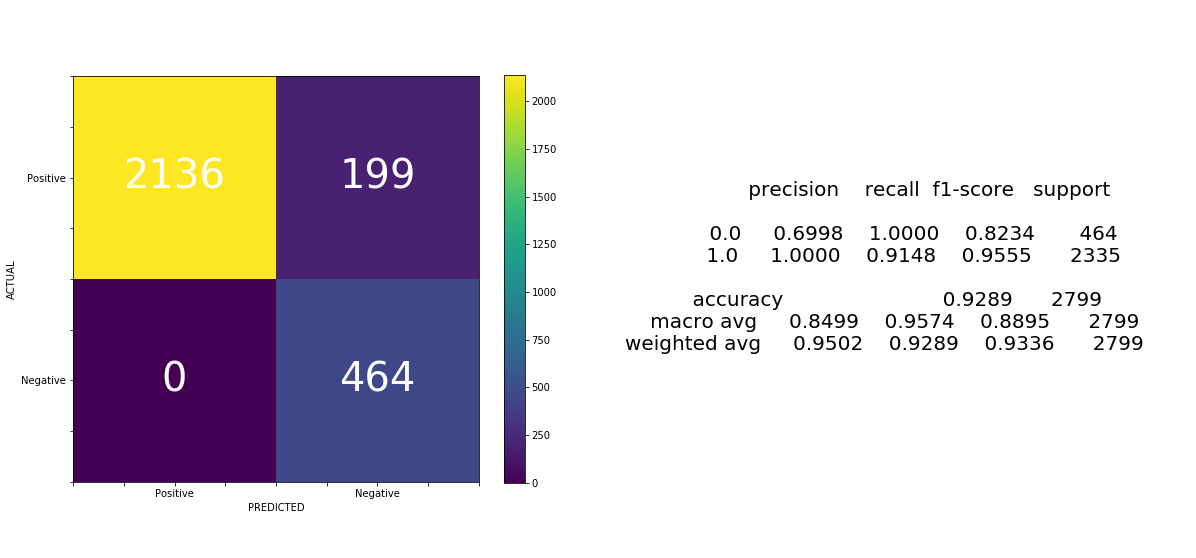

In [42]:
plot_confusion_matrix(model_5, X_train, Y_train)

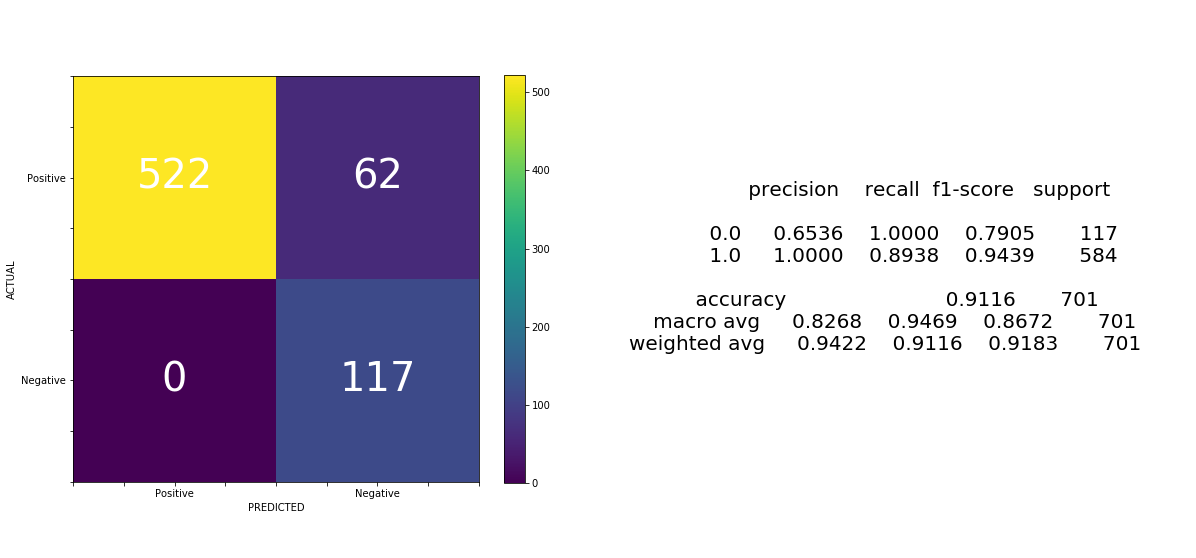

In [43]:
plot_confusion_matrix(model_5, X_val, Y_val)

We see that this model is performing well and it doesn't suffer the same tendency to predict anomalous ecg as normal. It has a tendency to predict normal ecg as abnormal, but in this context is preferable.

#### This last model could be considered a candidate solution for the original problem presented. Additional exploration of hyperparameters would be necessary to make a final conclusion.